In [1]:
import networkx as nx
import syft as sy
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 20))
import pprint

from syft.service.action.action_graph_service import ActionGraphService
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey
from syft.service.action.action_graph import Action, NodeActionData, NodeActionDataUpdate
from syft.service.action.action_graph import ActionStatus
from syft.service.action.numpy import NumpyArrayObject, ActionObject
from syft.service.action.action_graph import NetworkXBackingStore

print(sy.__version__)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/dk/Desktop/projects/PySyft


0.8.0-beta.9


<Figure size 4000x2000 with 0 Axes>

### Initialize the action graph service with verify key

In [2]:
store_config = InMemoryGraphConfig()
graph_store = InMemoryActionGraphStore(store_config=store_config)
action_graph_service = ActionGraphService(store=graph_store)

In [3]:
signing_key = SyftSigningKey.generate()
verify_key = signing_key.verify_key
authed_context = AuthedServiceContext(credentials=verify_key)

In [5]:
# create some actions and add them to the graph store
action_obj_a = ActionObject.from_obj([2, 4, 6])
action_obj_b = ActionObject.from_obj([2, 3, 4])
# action1 -> a + b = c
action1 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action1)
# action2 -> initialization of variable d
action_obj_d = ActionObject.from_obj([1, 2, 3])
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action2)
# action3 -> c * d
action3 = Action(
    path="action.execute",
    op="__mul__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action3)
# action4 -> d.astype('int32')
as_type_action_obj = ActionObject.from_obj("np.int32")
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id,
)
graph_store.set(credentials=verify_key, action=action4)

# check if the node action 2 has been mutated
node_action_data_2: NodeActionData = graph_store.get(
    uid=action2.id, credentials=verify_key
).ok()
node_action_data_2

```python
class NodeActionData:
  id: str = 816eab5134064c8fb3794470543f454f
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 04:14:39
  updated_at: str = 2023-04-26 04:14:39
  user_verify_key: str = 6fed6143a205c4126c24d87e25848b2a26eb5d374d469efc075c68f09b40e5bc
  is_mutated: str = True

```

### Create some dummy data

In [4]:
action_obj_a = ActionObject.from_obj([2, 4, 6])
action_obj_b = ActionObject.from_obj([2, 3, 4])

### Create the action graph

```
action1 -> a + b = c

action2 -> initialization of variable `d`

action3 -> c * d

action4 -> inplace updation of type of `d` (d.astype('int32'))

action5 -> d + 48
```

#### action1 -> a + b = c

In [5]:
action1 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action1)

```python
class NodeActionData:
  id: str = 875edf0b17ab4b76afe70131c6e5557d
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 04:09:12
  updated_at: str = None
  user_verify_key: str = b4df4e46311f5083d14581e5638ae388a4071e4e86b72aa92057039e542b96bd
  is_mutated: str = False

```

#### action2 -> initialization of variable `d`

In [6]:
action_obj_d = ActionObject.from_obj([1, 2, 3])
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action2)

```python
class NodeActionData:
  id: str = 51984a262d6b484585a36eaac0047f24
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 04:09:14
  updated_at: str = None
  user_verify_key: str = b4df4e46311f5083d14581e5638ae388a4071e4e86b72aa92057039e542b96bd
  is_mutated: str = False

```

In [7]:
node_action_data_2: NodeActionData = graph_store.get(
    uid=action2.id, credentials=verify_key
).ok()

In [8]:
node_action_data_2

```python
class NodeActionData:
  id: str = 51984a262d6b484585a36eaac0047f24
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 04:09:14
  updated_at: str = None
  user_verify_key: str = b4df4e46311f5083d14581e5638ae388a4071e4e86b72aa92057039e542b96bd
  is_mutated: str = False

```

#### action3 -> c * d

In [9]:
action3 = Action(
    path="action.execute",
    op="__mul__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action3)

```python
class NodeActionData:
  id: str = 0dd7530c69c34463b17836991199f112
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 04:09:44
  updated_at: str = None
  user_verify_key: str = b4df4e46311f5083d14581e5638ae388a4071e4e86b72aa92057039e542b96bd
  is_mutated: str = False

```

#### action4 -> d.astype('int32')

In [10]:
as_type_action_obj = ActionObject.from_obj('np.int32')
as_type_action_obj

'np.int32'

In [11]:
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,  # pay attention here
    args=[as_type_action_obj.syft_lineage_id],  # pay attention here
    kwargs={},
    result_id=action2.result_id  # pay attention here
)
action4

```python
class Action:
  id: str = 7c4a824da2dd44f2a15dd42688aa5d36
  path: str = "action.execute"
  op: str = "astype"
  remote_self: str = ac15a116481a4c54bf89fc92f21d748a
  args: str = [<LineageID: 12843657e16b44d0b701a51d1d0f10d5 - 802581761684485983>]
  kwargs: str = {}
  result_id: str = ac15a116481a4c54bf89fc92f21d748a

```

In [12]:
action_graph_service.add_action(context=authed_context, action=action4)

```python
class NodeActionData:
  id: str = 7c4a824da2dd44f2a15dd42688aa5d36
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 04:09:55
  updated_at: str = None
  user_verify_key: str = b4df4e46311f5083d14581e5638ae388a4071e4e86b72aa92057039e542b96bd
  is_mutated: str = False

```

In [20]:
node_action_data_2: NodeActionData = graph_store.get(
    uid=action2.id, credentials=verify_key
).ok()
node_action_data_2.is_mutated == True

True

#### action5 -> d + 48

In [13]:
arg_action_obj = ActionObject.from_obj(48)
action5 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action4.result_id,
    args=[arg_action_obj.syft_lineage_id],
    kwargs={},
)
action_graph_service.add_action(context=authed_context, action=action5)

```python
class NodeActionData:
  id: str = 0047678e565346cfb3506b1e93db9329
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 04:09:58
  updated_at: str = None
  user_verify_key: str = b4df4e46311f5083d14581e5638ae388a4071e4e86b72aa92057039e542b96bd
  is_mutated: str = False

```

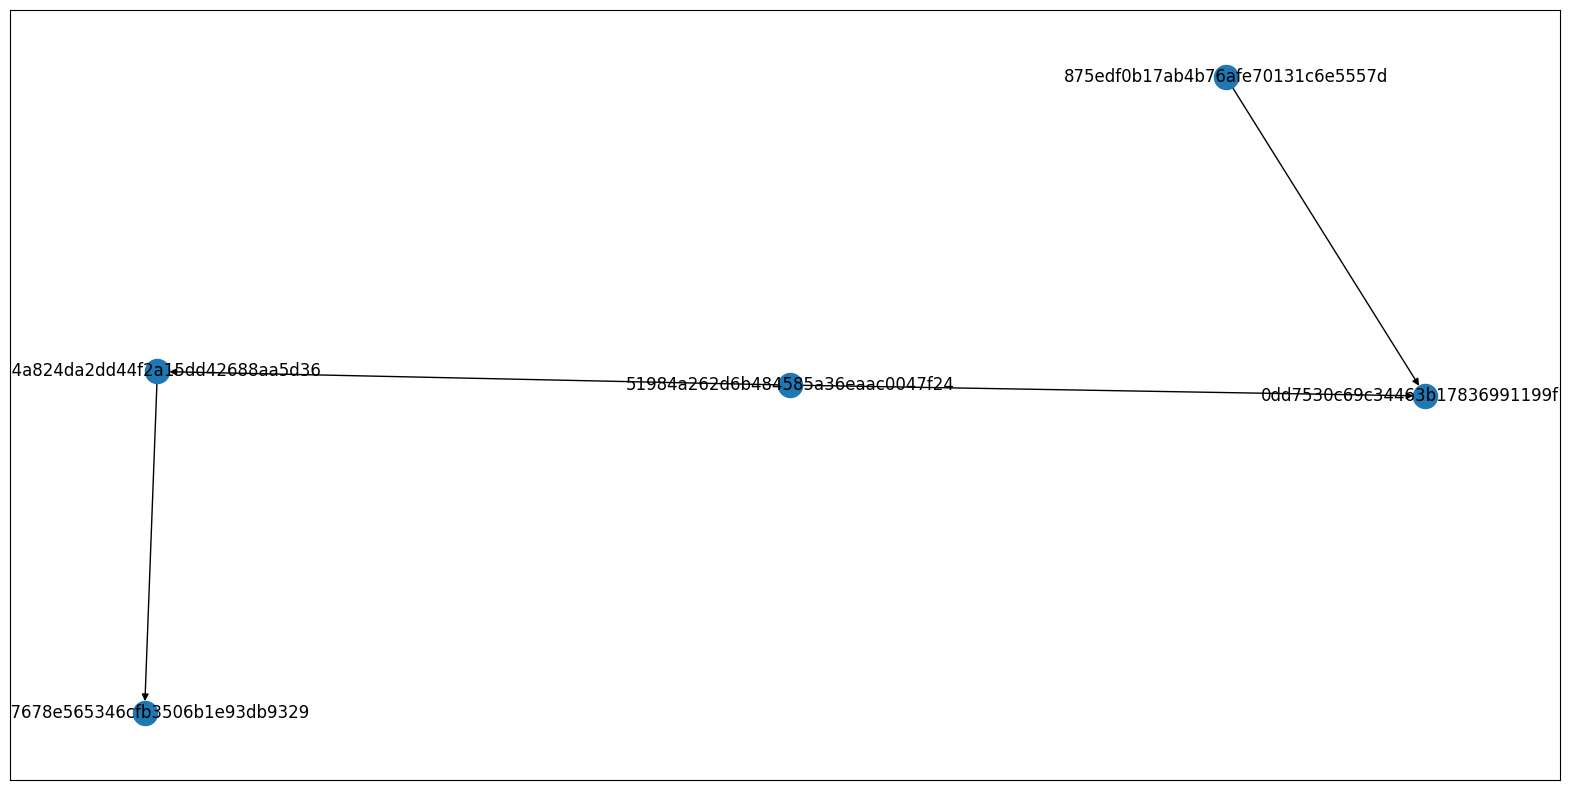

In [14]:
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

In [17]:
print(f"{action1.id = }")
print(f"{action2.id = }")
print(f"{action3.id = }")
print(f"{action4.id = }")
print(f"{action5.id = }")

action1.id = <UID: 875edf0b17ab4b76afe70131c6e5557d>
action2.id = <UID: 51984a262d6b484585a36eaac0047f24>
action3.id = <UID: 0dd7530c69c34463b17836991199f112>
action4.id = <UID: 7c4a824da2dd44f2a15dd42688aa5d36>
action5.id = <UID: 0047678e565346cfb3506b1e93db9329>


## Mutation

In [2]:
store_config = InMemoryGraphConfig()
graph_store = InMemoryActionGraphStore(store_config=store_config)
action_graph_service = ActionGraphService(store=graph_store)

In [3]:
signing_key = SyftSigningKey.generate()
verify_key = signing_key.verify_key
authed_context = AuthedServiceContext(credentials=verify_key)

#### action1 -> initialization of variable `a`

In [4]:
action_obj_a = ActionObject.from_obj([1, 2, 3])
action1 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_a.syft_lineage_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action1)

```python
class NodeActionData:
  id: str = 29f5bbb86c804a43ace489cd465cf432
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 03:46:15
  updated_at: str = None
  user_verify_key: str = b4dbfda114857e4b4a5235847487c9e368c248daf2ab7b6fb8de35c3a5922a8e
  is_mutated: str = False

```

#### action2 -> a.astype('int32') = b: mutation

In [5]:
as_type_action_obj = ActionObject.from_obj('np.int32')
action2 = Action(
    path="action.execute",
    op="astype",
    remote_self=action1.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action1.result_id  # pay attention here
)
action_graph_service.add_action(context=authed_context, action=action2)

```python
class NodeActionData:
  id: str = f74d663c5fd24dc9a076bfe2548e04f3
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 03:46:18
  updated_at: str = None
  user_verify_key: str = b4dbfda114857e4b4a5235847487c9e368c248daf2ab7b6fb8de35c3a5922a8e
  is_mutated: str = False

```

#### action3 -> b.astype('float64') = c: mutation

In [6]:
as_type_action_obj = ActionObject.from_obj('np.float64')
action3 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id
)
action_graph_service.add_action(context=authed_context, action=action3)

```python
class NodeActionData:
  id: str = 5562dc9f86fd457ca8aa82b340db0601
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 03:46:21
  updated_at: str = None
  user_verify_key: str = b4dbfda114857e4b4a5235847487c9e368c248daf2ab7b6fb8de35c3a5922a8e
  is_mutated: str = False

```

#### action4 -> a.astype('complex128') = d: mutation

In [7]:
as_type_action_obj = ActionObject.from_obj('np.complex128')
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action1.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action1.result_id
)
action_graph_service.add_action(context=authed_context, action=action4)

```python
class NodeActionData:
  id: str = 095791a38deb4d0bb9339de8bfe9293a
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 03:46:23
  updated_at: str = None
  user_verify_key: str = b4dbfda114857e4b4a5235847487c9e368c248daf2ab7b6fb8de35c3a5922a8e
  is_mutated: str = False

```

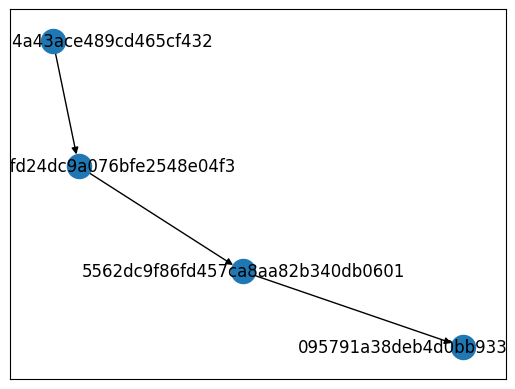

In [8]:
action_graph_service.store.graph.visualize()

In [9]:
print(f"{action1.id = }")
print(f"{action2.id = }")
print(f"{action3.id = }")
print(f"{action4.id = }")

action1.id = <UID: 29f5bbb86c804a43ace489cd465cf432>
action2.id = <UID: f74d663c5fd24dc9a076bfe2548e04f3>
action3.id = <UID: 5562dc9f86fd457ca8aa82b340db0601>
action4.id = <UID: 095791a38deb4d0bb9339de8bfe9293a>


In [15]:
node_action_data_1 = graph_store.get(uid=action1.id, credentials=verify_key).ok()
node_action_data_2 = graph_store.get(uid=action2.id, credentials=verify_key)
node_action_data_3 = graph_store.get(uid=action3.id, credentials=verify_key)
node_action_data_4 = graph_store.get(uid=action4.id, credentials=verify_key)

In [16]:
node_action_data_1

```python
class NodeActionData:
  id: str = 29f5bbb86c804a43ace489cd465cf432
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 03:46:15
  updated_at: str = 2023-04-26 03:46:23
  user_verify_key: str = b4dbfda114857e4b4a5235847487c9e368c248daf2ab7b6fb8de35c3a5922a8e
  is_mutated: str = True

```

In [17]:
graph_store.is_parents()

In [22]:
list(graph_store.graph.get_successors(node_action_data_1.id))

,type,id
0,<UID: f74d663c5fd24dc9a076bfe2548e04f3>,None


### Serde

In [16]:
graph_store

In [17]:
bytes_data = sy.serialize(action_graph_service.store, to_bytes=True)

In [18]:
de_graph_store = sy.deserialize(bytes_data, from_bytes=True)

In [19]:
de_graph_store.graph.nodes()

NodeDataView({<UID: 6d4c398ecd86412db5b078ebd0448a5f>: {}, <UID: 4057da48c73b494cb52fd329fa15084b>: {}, <UID: c7d8b9c5e6934dcdbf0ade2a08ac22c0>: {}, <UID: 8103b86d4c274fcda0e007a1021a41e4>: {}, <UID: c4e8dabdebc0480db80fc03099885175>: {}})

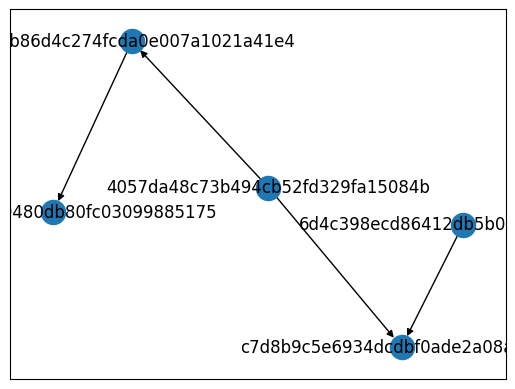

In [20]:
action_graph_service.store.graph.visualize()

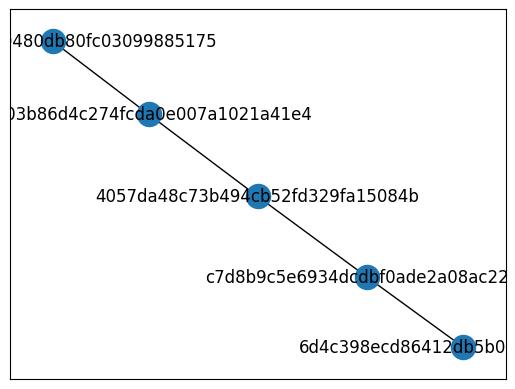

In [21]:
de_graph_store.graph.visualize()

In [22]:
action_graph_service.store.graph.db